# Discrete Random Variables - Visualisation and Analysis

This IPython notebook application allows you to key in the *probability density function* (p.d.f) of any *discrete random variable* (d.r.v) $X$, for instance:

<table>
<tr>
<th> $x$ </th>
<th> 1 </th>
<th> 2 </th>
<th> 3 </th>
<th> 4 </th>
</tr>
<tr>
<td>$P(X=x)$</td>
<td> 0.125 </td>
<td> 0.375 </td>
<td> 0.375 </td>
<td> 0.125 </td>
</tr>
</table>

You will then be automatically generated a statistical dashboard for visualisation and analysis! This statisical dashboard includes:

- Plot for the *probability density function* (p.d.f) of $X$:  $f(x)=P(X=x)$ 
- Plot for the *probability cumulative function* (c.d.f) of $X$: $F(x)=P(X \leq x)$ 
- *Expectation* of $X$: $\mu=E(X)=\sum_{x} xP(X=x)$
- *Variance* of $X$: $\sigma^{2}=Var(X)=E\left[ (X-\mu)^{2} \right]$, where $\sigma$ is the standard deviation (S.D.)
- *Mode* of $X$: the integer $r$ for which $P(X=r)$ is the largest
- *Median* of $X$: the smallest integer $Q_{2}$ for which $F(Q_{2})\geq 0.5$ 
- *1st and 3rd Quartiles*: smallest integers $Q_{1},Q_{3}$ such that $F(Q_{1})\geq 0.25$ and $F(Q_{3})\geq 0.75$
- *Interquartile Range* (IQR): $IQR=Q_{3}-Q_{1}$, and is also used as a measure for the spread of values, similar to  standard deviation.

You can also apply any arbitary function $g$ on $X$ to get another d.r.v. to experiment.

Scroll down and have fun exploring! 


Click on the code snippets below and then 
- press the *'play'* buttons or 
- *'Clrt+Enter'* 

in order to run the Python code snippets.



**IMPORTANT!** Run the first two code snippets below to importing Python packages before scrolling further.

In [ ]:
#@title
from IPython.display import Math, HTML, Latex
def enable_sympy_in_cell():
  display(HTML("<script src='https://cdnjs.cloudflare.com/ajax/libs/"
               "mathjax/2.7.3/latest.js?config=default'></script>"))
get_ipython().events.register('pre_run_cell', enable_sympy_in_cell)

In [ ]:
#@title
import pandas as pd
import numpy as np
import sympy
from sympy import sin, cos, tan, exp, log, symbols, lambdify, sympify, Float, init_printing
from fractions import Fraction
import matplotlib.pyplot as plt
from IPython.display import display
import scipy.stats
from scipy.stats import binom

# [Optional] Generating the p.d.f. of a binomial distribution $B(n,q)$

Adjust $n,q$ if you wish to find the p.d.f of a binomial distribution $X$~ $B(n,q)$ for input in Section 1.

$P(X=x)= {n \choose x} q^{x} (1-q)^{n-x}$, where ${n \choose x}=\frac{n!}{x! (n-x)!}$, $x=0,1,\ldots,n$.

1. Select a integer for $n$
2. Adjust for the required probability $q$
3. Run the code snippet below.

In [ ]:
# Select a integer for n
n = 5 #@param {type:"slider", min:2, max:30, step:1}

# q: Adjust for the required probability  q
q = 0.25 #@param {type:"slider", min:0.01, max:1, step:0.01}

df0=pd.DataFrame({'x': np.arange(int(n+1)), 'p=P(X=x)': binom.pmf(np.arange(n+1), n, q)}, columns=['x', 'p=P(X=x)'])
print(df0.T)

                 0         1         2         3         4         5
x         0.000000  1.000000  2.000000  3.000000  4.000000  5.000000
p=P(X=x)  0.237305  0.395508  0.263672  0.087891  0.014648  0.000977


List of $x$ and $p$ for input in Section 1 (you may copy and paste from here the values of $x$, $p$ and **adding commas ","**).

# Section 1: Input values of $x, p$ for D.R.V.

1. To run the code snippets below
  - hover or click on the code snippet
  - press the *'play'* buttons on the left of the code snippet or *'Clrt+Enter'*

2. Then key in all possible values for $x$ and $p$,
3. The possible values for $x$, $p$ keyed in must be comma separated, e.g. 1, 2, 3.
3. Press 'Enter' to finalise the input values of $x$ and $p$.

In [ ]:
#@title
raw_input = input("Please key in all possible values for x:")
# The possible values for x keyed in must be space-separated, e.g. 1 2 3'
str_arr=[s.strip() for s in raw_input.split(',')]

X = np.array([float(num) for num in str_arr])
print("X = ", X)

Please key in all possible values for x:0.00000,  1.00000,  2.0000,  3.0000,  4.00000,  5.00000
X =  [0. 1. 2. 3. 4. 5.]


For the following input of probabilities $p=P(X=x)$, please ensure
-  the number of probability values $p$ is equal to the number of input values for $x$ above!
- the probabilities values keyed in for $p$ must be comma separated, 
  - e.g. `1/4, 1/2, 1/4`.
- the probabilities values must be in fractional form or decimal form, e.g.
  - `1/4, 1/2, 1/4` or 
  - `0.25, 0.5, 0.25` or 
  - `1/4, 0.5, 1/4`.

In [ ]:
#@title
prob_input = input("Input an string of probabilities values for p:")
str_arr2=[pr.strip() for pr in prob_input.split(',')]

p=[]
for num in str_arr2:
  if sympify(sympify(num).is_Float):
    p.append(float(Float(num)))
  if sympify(sympify(num).is_Rational):
    p.append(float(Fraction(num)))
p=np.array(p)
df3=pd.DataFrame({'x': X, 'P(X=x)': p, 'P(X <= x)':np.cumsum(p)}, columns=['x', 'P(X=x)', 'P(X <= x)'])
print(df3.T)

Input an string of probabilities values for p: 0.237305,  0.395508,  0.263672,  0.087891,  0.014648,  0.000977
                  0         1         2         3         4         5
x          0.000000  1.000000  2.000000  3.000000  4.000000  5.000000
P(X=x)     0.237305  0.395508  0.263672  0.087891  0.014648  0.000977
P(X <= x)  0.237305  0.632813  0.896485  0.984376  0.999024  1.000001


Play the code snippet below to check whether the sum of input probabilities $p$ add up to 1, before proceeding to Section 2.

In [ ]:
#@title
eps=1e-5
if np.abs(1-np.sum(p))>eps:
  print('The probabilities values should add up to 1, please check and re-enter the values for p above.')
else:
  print('The sum of probabilities add up to 1, you are good to proceed!')

The sum of probabilities add up to 1, you are good to proceed!


# Section 2: Data Visualisation and Analysis

The following is a statisical dashboard for visualisation and analysis.

1. To run the code snippets below to see the visualisations
  - hover or click on the code snippet
  - press the *'play'* buttons on the left of the code snippet or *'Clrt+Enter'* 


In [ ]:
#@title
# Calculation of Expectation, Variance, Standard Deviation, Mode, Median,
# quartiles, and interquartile range
Expectation=np.sum(np.multiply(X,p))
Variance=np.sum(np.multiply(np.power(X,2),p))-Expectation**2
Std_Dev=np.power(Variance,0.5)
epsilon=1e-5
# Mode
mode_index=np.argmax(p)
Mode=X[mode_index]

# Median (Q2)
median_index=np.argmax(np.reciprocal(np.cumsum(p)-0.5+epsilon))
Median=X[median_index]

# Quartile1 (Q1)
Q1_index=np.argmax(np.reciprocal(np.cumsum(p)-0.25+epsilon))
Quartile1=X[Q1_index]
# Quartile3 (Q3)
Q3_index=np.argmax(np.reciprocal(np.cumsum(p)-0.75+epsilon))
Quartile3=X[Q3_index]
IQR=Quartile3-Quartile1

# Interquartile Range (IQR)
IQR=Quartile3-Quartile1

# Display Statistics
stats_array=np.array([Expectation,Variance,Std_Dev,Mode,Quartile1,Median,Quartile3,IQR]).T
stats_col = ['E(X)','Var(X)', 'S.D.', 'Mode', 'Q1', 'Q2 (Median)', 'Q3', 'IQR']
df_stats = pd.DataFrame(stats_array, index=stats_col, columns=['Statistics'])
df_stats.T

,E(X),Var(X),S.D.,Mode,Q1,Q2 (Median),Q3,IQR
Statistics,1.250002,0.937503,0.968247,1.0,1.0,1.0,2.0,1.0


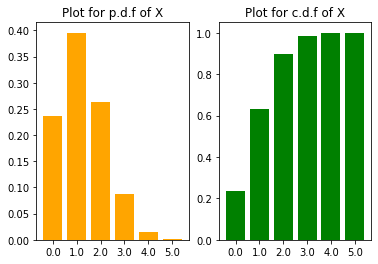

In [ ]:
#@title
# Using Matplotlib for Barplots of p.d.f and c.d.f. of random variable X
fig, (ax1,ax2) = plt.subplots(1, 2)
ax1.bar(X, p, color='orange', linewidth=2, tick_label=X)
ax1.set_title('Plot for p.d.f of X')
ax2.bar(X, np.cumsum(p),color='green', linewidth=1, tick_label=X )
ax2.set_title('Plot for c.d.f of X')
plt.show()

**Q1**: Comparing the expectation, median and mode of X, what could we conclude about the skewness of this distribution (left or right skewed or symmetrical)?"


**Suggested Answer to Q1**: 

If the distribution is not symmetrical, then the mean, mode and median can be used to figure out if you have a left or right-skewed distribution.
- If the mean is greater than the mode, the distribution is right-skewed (long-right tailed).
- If the mean is less than the mode, the distribution is left-skewed (long-left tailed).
- If the mean is greater than the median, the distribution is right-skewed (long-right tailed).
- If the mean is less than the median, the distribution is left-skewed (long-left tailed).

**Q2**: For this distribution, is standard deviation (S.D.) or interquartile range (IQR) a more appropriate measure for the spread of values?

**Suggested Answer to Q2**: 

Both metrics measure the spread of values in a dataset.
However, the interquartile range and standard deviation have the following key difference:

- The interquartile range (IQR) is not affected by extreme outliers. For example, an extremely small or extremely large value in a dataset will not affect the calculation of the IQR because the IQR only uses the values at the 25th percentile and 75th percentile of the dataset.

- The standard deviation is affected by extreme outliers. For example, an extremely large value in a dataset will cause the standard deviation to be much larger since the standard deviation uses every single value in a dataset in its formula.

You should use the interquartile range to measure the spread of values in a dataset when there are extreme outliers present.

# Section 3: Transfoming D.R.V. with functions

For the following code snippet, we shall input an expression for function $g$ to perform transformation on the d.r.v. Please ensure 

- the expression input for $g(x)$ is in terms of $x$, not $X$! It is lettercase sensitive.
- Examples of $g(x)$ for input: 
  - `2*x+1, x**2, exp(x), sin(x), cos(x), log(x)`)
- The above examples correspond to  
  - $2x+1$, $x^{2}$, $e^{x}$, $\sin(x)$, $\cos(x)$, $\ln(x)$.'

In [ ]:
#@title
x = symbols('x')
init_printing(use_latex='mathjax')

expr = input("Input the expression of g(x)=")
func=sympify(expr)
print("Input function g(x)=")
display(func)

g = lambdify(x, func, 'numpy')

Input the expression of g(x)=2*x+1
Input function g(x)=


2⋅x + 1

The P.D.F of $g(X)$ is given as follows:

In [ ]:
#@title
df4 = pd.DataFrame({'x': X, 'g(x)': g(X), 'P(X=x)': p}, columns=['x','g(x)', 'P(X=x)'])
df4.T

,0,1,2,3,4,5
x,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000
g(x),1.000000,3.000000,5.000000,7.000000,9.000000,11.000000
P(X=x),0.237305,0.395508,0.263672,0.087891,0.014648,0.000977


Please view and compare the expectations and variances for $g(X)$ and $X$, using the codes below

In [ ]:
#@title
Expectation_g=np.sum(np.multiply(g(X),p))
Variance_g=np.sum(np.multiply(np.power(g(X),2),p))-Expectation_g**2
Std_Dev_g=np.power(Variance_g,0.5)

stats_array_g=np.array([Expectation_g,Variance_g,Std_Dev_g]).T
stats_col_g = ['E(g(X))','Var(g(X))', 'S.D.']
df_stats_g = pd.DataFrame(stats_array_g, index=stats_col_g, columns=['Statistics'])

df_stats_g.T

,E(g(X)),Var(g(X)),S.D.
Statistics,3.500005,3.750006,1.936493


In [ ]:
#@title
stats_array2=np.array([Expectation,Variance,Std_Dev]).T
stats_col2 = ['E(X)','Var(X)', 'S.D']
df_stats2 = pd.DataFrame(stats_array2, index=stats_col2, columns=['Statistics'])
df_stats2.T

,E(X),Var(X),S.D
Statistics,1.250002,0.937503,0.968247


**Q3**: When $g(X)=aX+b$, what can we say about
- $E(aX+b), E(X)$?
- $Var(aX+b)$ and $Var(X)$?

You may experiment with different values of $a$ and $b$ to vary the input/output of $g(X)=aX+b$ above, e.g. $a,b=0,1,2$.





**Suggested Answer to Q3**: 

When $g(X)=aX+b$, where $a,b \in \mathbb{R}$, then from the above calculations, we can infer that
- $E(aX+b)=aE(X)+b$, 
- $Var(aX+b)=a^{2}Var(X)$, 

where it can be checked that 

- $E(aX)=aE(X), E(b)=b$
- $Var(aX)=a^{2}Var(X), Var(b)=0$.